In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', 50)
sns.set(style="whitegrid")


In [3]:
benin = pd.read_csv('data/benin-malanville.csv')
sierra1 = pd.read_csv('data/sierraleone_clean.csv')
sierra2 = pd.read_csv('data/sierraleone-bumbuna.csv')
togo = pd.read_csv('data/togo-dapaong_qc.csv')

sierra = pd.concat([sierra1, sierra2], ignore_index=True)

benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sierra, togo], ignore_index=True)

display(df.head())
print("\nDataset counts per country:")
print(df['Country'].value_counts())
print("\nDataframe info:")
df.info()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin



Dataset counts per country:
Country
Sierra Leone    1051200
Benin            525600
Togo             525600
Name: count, dtype: int64

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102400 entries, 0 to 2102399
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Timestamp      object 
 1   GHI            float64
 2   DNI            float64
 3   DHI            float64
 4   ModA           float64
 5   ModB           float64
 6   Tamb           float64
 7   RH             float64
 8   WS             float64
 9   WSgust         float64
 10  WSstdev        float64
 11  WD             float64
 12  WDstdev        float64
 13  BP             int64  
 14  Cleaning       int64  
 15  Precipitation  float64
 16  TModA          float64
 17  TModB          float64
 18  Comments       float64
 19  Country        object 
dtypes: float64(16), int64(2), object(2)
memory usage: 320.8+ MB


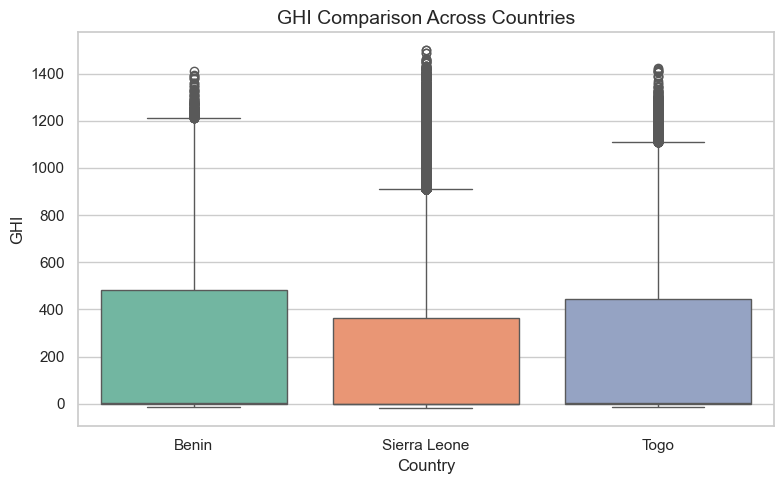

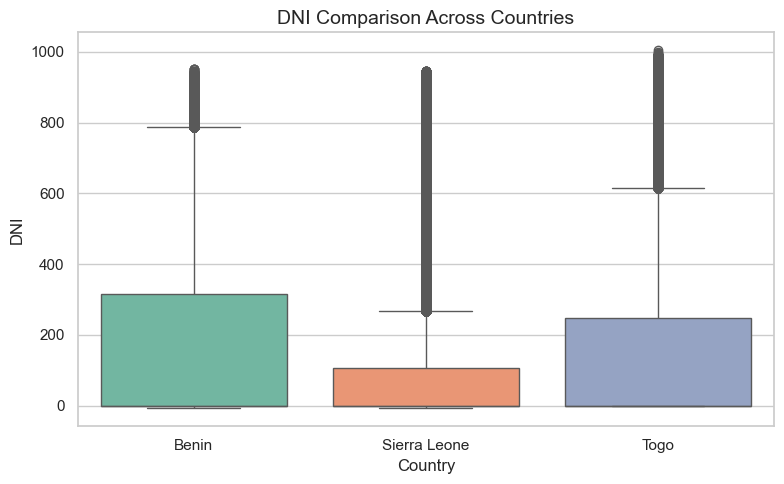

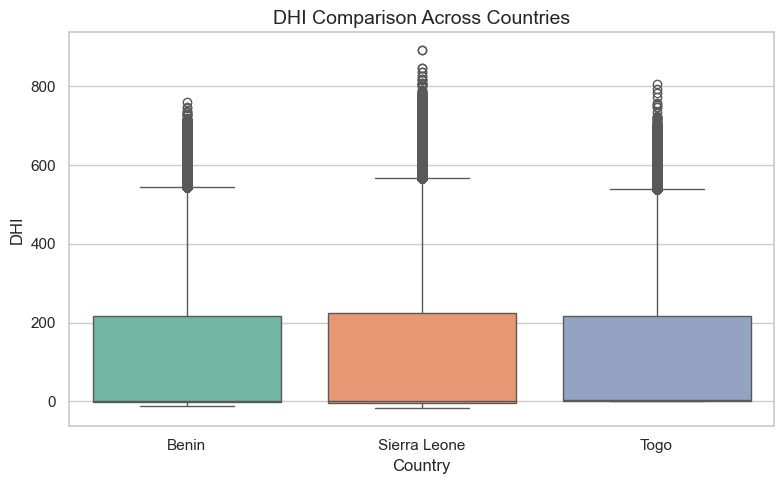

In [5]:
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='Country', y=metric, hue='Country', palette='Set2', legend=False)
    plt.title(f'{metric} Comparison Across Countries', fontsize=14)
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.tight_layout()
    plt.show()


In [6]:
summary = (
    df.groupby('Country')[['GHI', 'DNI', 'DHI']]
      .agg(['mean', 'median', 'std'])
      .round(2)
)

summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [7]:
ghi_benin = df.loc[df['Country'] == 'Benin', 'GHI'].dropna()
ghi_sierra = df.loc[df['Country'] == 'Sierra Leone', 'GHI'].dropna()
ghi_togo = df.loc[df['Country'] == 'Togo', 'GHI'].dropna()

anova_result = stats.f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print("ANOVA test for GHI differences:")
print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.5f}")

kruskal_result = stats.kruskal(ghi_benin, ghi_sierra, ghi_togo)
print("\nKruskal–Wallis test for GHI differences:")
print(f"H-statistic: {kruskal_result.statistic:.3f}, p-value: {kruskal_result.pvalue:.5f}")

if anova_result.pvalue < 0.05:
    print("\n There is a statistically significant difference in GHI across countries (p < 0.05).")
else:
    print("\n No statistically significant difference in GHI across countries (p ≥ 0.05).")


ANOVA test for GHI differences:
F-statistic: 3162.627, p-value: 0.00000

Kruskal–Wallis test for GHI differences:
H-statistic: 6748.083, p-value: 0.00000

 There is a statistically significant difference in GHI across countries (p < 0.05).


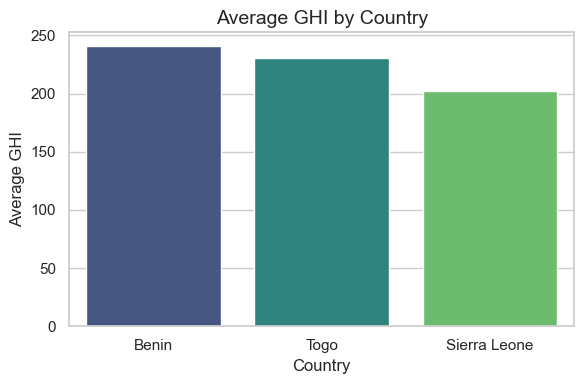

Country
Benin           240.559452
Togo            230.555040
Sierra Leone    201.957515
Name: GHI, dtype: float64

In [9]:
avg_ghi = (
    df.groupby('Country')['GHI']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(
    x=avg_ghi.index,
    y=avg_ghi.values,
    hue=avg_ghi.index,  
    palette='viridis',
    legend=False           
)
plt.title('Average GHI by Country', fontsize=14)
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

avg_ghi


In [ ]:
### Key Observations

- Benin shows the highest median and average GHI, indicating the strongest solar potential among the three countries.
- Sierra Leone exhibits the greatest variability in GHI values, suggesting solar energy yield may be less consistent.
- Togo has moderate but relatively stable GHI values, offering steady solar performance potential.
